In [99]:
import pandas as pd
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import pearsonr
from itertools import combinations
from sklearn import linear_model
from pandas.plotting import scatter_matrix

In [82]:
student_perform = pd.read_csv("StudentsPerformance.csv")
student_perform.columns = [x.replace(" ", "_") for x in student_perform.columns]
student_perform.head()
student_perform.dtypes




gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

[(0.9931508302688599, 0.0001453401637263596), (0.9929210543632507, 0.0001056220498867333), (0.9919633269309998, 2.9172901122365147e-05)]
predictor: math_score, response: reading_score, Pearson_coef = 0.817579663672054, p_value = 1.787753109906955e-241, tg = 0.7872292395756437, b = 17.141806785685283
predictor: math_score, response: writing_score, Pearson_coef = 0.8026420459498078, p_value = 3.3760270425707667e-226, tg = 0.8043664714246163, b = 14.89422427001854
predictor: reading_score, response: writing_score, Pearson_coef = 0.9545980771462478, p_value = 0.0, tg = 0.9935311142409595, b = -0.6675536409329226


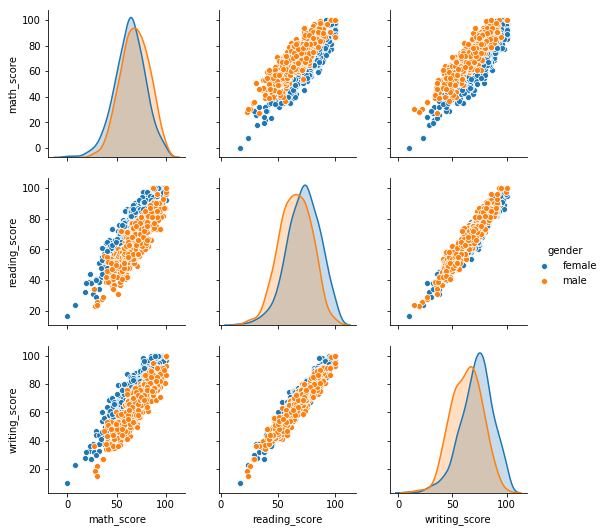

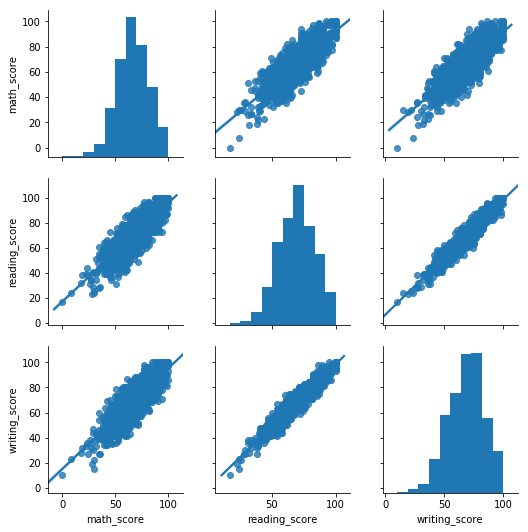

In [81]:
#lets see the data
sns.pairplot(student_perform[['gender','math_score', 'reading_score', 'writing_score']], hue='gender')

#lets check the normality of data
stat_p=list(map(lambda x: shapiro(x), [student_perform['math_score'], student_perform['reading_score'], student_perform['writing_score']]))
print(stat_p)

#seems that data is normally distributed with significatn p-value reading_score
#find Pearson's correlation coefficiensts and linear model parameters
comb = list(combinations(['math_score', 'reading_score', 'writing_score'],2))
for i in comb:
    pears = pearsonr(student_perform[i[0]],student_perform[i[1]])
    X=student_perform[i[0]].values.reshape(-1, 1)
    Y=student_perform[i[1]].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    Y_pred = regr.predict(X)
    print (f'predictor: {i[0]}, response: {i[1]}, Pearson_coef = {pears[0]}, p_value = {pears[1]}, tg = {regr.coef_[0][0]}, b = {regr.intercept_[0]}')

#lets visualize linear models
sns.pairplot(student_perform[['math_score', 'reading_score', 'writing_score']],kind='reg')






race/ethnicity                 0.046563
parental_level_of_education    0.006320
lunch                          1.000000
Name: lunch, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08de59ea58>,
      dtype=object)

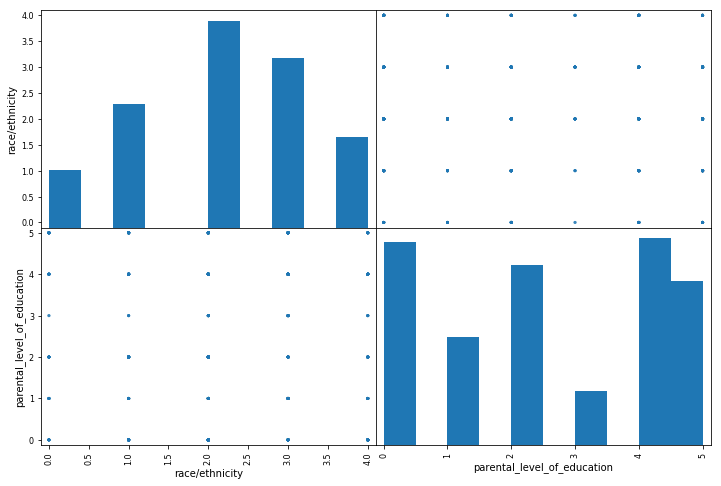

In [103]:
#lets lets see dapendencies between categorical variables and lunch
student_perform['race/ethnicity'] = student_perform['race/ethnicity'].astype('category').cat.codes
student_perform['lunch'] = student_perform['lunch'].astype('category').cat.codes
student_perform['parental_level_of_education'] = student_perform['parental_level_of_education'].astype('category').cat.codes

cor=student_perform[['race/ethnicity','parental_level_of_education','lunch']].corr()['lunch'][:]
print(cor)
attributes = ['race/ethnicity','parental_level_of_education']
scatter_matrix(student_perform[attributes], figsize=(12, 8))
